# Quantum Neural Network (QNN) - Basic

In [1]:
# Impor librari
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import ZFeatureMap
from qiskit.circuit.library import PauliFeatureMap
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector, circuit_drawer

from sympy import symbols, sqrt, latex

from PIL import Image

# 3. Menambahkan Anzats

### Single Qubit

- Sebelum entanglement

In [9]:
# 1 fitur klasik
x = 5

# Membuat QC dengan 2 qubit
qc1 = QuantumCircuit(2)

# Rotasi H (Hadamard) pada qubit dengan nilai fitur x sebagai sudut rotasi
qc1.h(0)
qc1.h(1)

# Anzats dapat terdiri dari serangkaian gerbang kuantum yang kompleks atau parameterized
# Anzats dengan serangkaian rotasi Y dan rotasi parametrik pada qubit
qc1.rx(0.5, 0)              # Rotasi Y pada keadaan qubit 0 sebesar 0.5 radian
qc1.ry(0.5 * x, 1)          # Rotasi parametrik (bergantung pada nilai fitur x) pada keadaan qubit 1 sebesar 0.5*x radian 

# Gerbang CNOT untuk membuat entanglement antar keadaan qubit
qc1.cx(0, 1)

simulator = Aer.get_backend('statevector_simulator')
result = execute(qc1, simulator).result()
statevector = result.get_statevector()
print(qc1)
print(statevector)

     ┌───┐┌─────────┐     
q_0: ┤ H ├┤ Rx(0.5) ├──■──
     ├───┤├─────────┤┌─┴─┐
q_1: ┤ H ├┤ Ry(2.5) ├┤ X ├
     └───┘└─────────┘└───┘
Statevector([-0.30698162+0.07838528j,  0.61250137-0.15639728j,
              0.61250137-0.15639728j, -0.30698162+0.07838528j],
            dims=(2, 2))


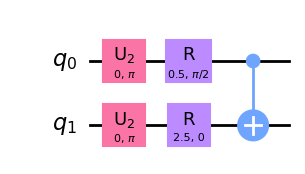

In [4]:
qc1.decompose().draw(output="mpl", fold=50)          # fold=50, maksimal blok-gate yang tampil dalam satu baris

- Setelah entanglement

In [10]:
# 1 fitur klasik
x = 5

# Membuat QC dengan 2 qubit
qc2 = QuantumCircuit(2)

# Rotasi H (Hadamard) pada qubit dengan nilai fitur x sebagai sudut rotasi
qc2.h(0)
qc2.h(1)

# Gerbang CNOT untuk membuat entanglement antar keadaan qubit
qc2.cx(0, 1)

# Anzats dapat terdiri dari serangkaian gerbang kuantum yang kompleks atau parameterized
# Anzats dengan serangkaian rotasi Y dan rotasi parametrik pada qubit
qc2.rx(0.5, 0)              # Rotasi Y pada keadaan qubit 0 sebesar 0.5 radian
qc2.ry(0.2 * x, 1)          # Rotasi parametrik (bergantung pada nilai fitur x) pada keadaan qubit 1 sebesar 0.5*x radian 

simulator = Aer.get_backend('statevector_simulator')
result = execute(qc2, simulator).result()
statevector = result.get_statevector()
print(qc2)
print(statevector)

     ┌───┐     ┌─────────┐
q_0: ┤ H ├──■──┤ Rx(0.5) ├
     ├───┤┌─┴─┐└┬───────┬┘
q_1: ┤ H ├┤ X ├─┤ Ry(1) ├─
     └───┘└───┘ └───────┘ 
Statevector([0.19288964-0.04925281j, 0.19288964-0.04925281j,
             0.657411  -0.16786459j, 0.657411  -0.16786459j],
            dims=(2, 2))


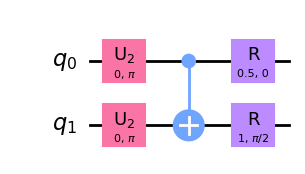

In [11]:
qc2.decompose().draw(output="mpl", fold=50)          

### Multi Qubit

In [15]:
# Nilai fitur klasik
x1 = 5
x2 = 8

# Membuat sirkuit quantum dengan 2 qubit
qc3 = QuantumCircuit(2)

# Hadamard pada qubit qi
qc3.h(0)
qc3.h(1)

# Rotasi X pada qubit qi sesuai dengan xi
qc3.rx(x1, 0)
qc3.rx(x2, 1)

# Anzats
qc3.ry(0.4 * x, 0)
qc3.ry(0.2 * x, 1)

# Menambahkan gerbang CNOT untuk membuat entanglement antar qubit
qc3.cx(0, 1)

simulator = Aer.get_backend('statevector_simulator')
result = execute(qc3, simulator).result()
statevector = result.get_statevector()
print(qc3)
print(statevector)

     ┌───┐┌───────┐┌───────┐     
q_0: ┤ H ├┤ Rx(5) ├┤ Ry(2) ├──■──
     ├───┤├───────┤├───────┤┌─┴─┐
q_1: ┤ H ├┤ Rx(8) ├┤ Ry(1) ├┤ X ├
     └───┘└───────┘└───────┘└───┘
Statevector([-0.0585525 +0.01289778j,  0.91558877-0.20168333j,
             -0.19955999+0.04395852j,  0.26864106-0.0591755j ],
            dims=(2, 2))


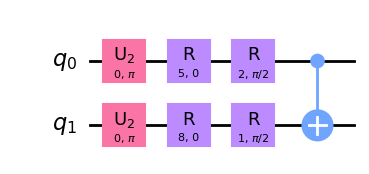

In [16]:
qc3.decompose().draw(output="mpl", fold=50)          

In [19]:
# Nilai fitur klasik
x1 = 0.5
x2 = 0.8
x3 = 1.2

# Membuat QC dengan 3 qubit
qc4 = QuantumCircuit(3)

# Hadamard dan Rotasi X pada qubit qi sesuai dengan nilai fitur x1
qc4.h(0)
qc4.h(1)
qc4.h(2)
qc4.rx(x1, 0)
qc4.rx(x2, 1)
qc4.rx(x3, 2)

# Anzats
qc4.ry(0.4 * x, 0)
qc4.ry(0.2 * x, 1)
qc4.ry(0.1 * x, 2)

# Entanglement menggunakan CNOT 
qc4.cx(0, 1)                            #(misal: qubit 0 sebagai kontrol, qubit 1 sebagai target)
qc4.cx(1, 2)                            #(misal: qubit 0 sebagai kontrol, qubit 1 sebagai target)

simulator = Aer.get_backend('statevector_simulator')
result = execute(qc4, simulator).result()
statevector = result.get_statevector()
print(qc4)
print(statevector)

     ┌───┐┌─────────┐ ┌───────┐           
q_0: ┤ H ├┤ Rx(0.5) ├─┤ Ry(2) ├───■───────
     ├───┤├─────────┤ ├───────┤ ┌─┴─┐     
q_1: ┤ H ├┤ Rx(0.8) ├─┤ Ry(1) ├─┤ X ├──■──
     ├───┤├─────────┤┌┴───────┴┐└───┘┌─┴─┐
q_2: ┤ H ├┤ Rx(1.2) ├┤ Ry(0.5) ├─────┤ X ├
     └───┘└─────────┘└─────────┘     └───┘
Statevector([-0.00964529+0.02902818j,  0.150824  -0.45391532j,
             -0.05541771+0.16678346j,  0.07460149-0.22451839j,
             -0.01626   +0.0489356j ,  0.25425855-0.76520882j,
             -0.03287331+0.09893452j,  0.04425297-0.13318238j],
            dims=(2, 2, 2))


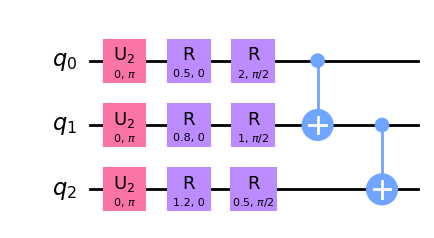

In [20]:
qc4.decompose().draw(output="mpl", fold=50)          